In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
ice = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20ICE.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ice.columns = ['ice', 'ice-m3', 'agricola', 'comercio', 'construccion', 'financiero', 'industria', 'mineria']
ice = ice.drop('ice-m3', axis=1)
ice

,ice,agricola,comercio,construccion,financiero,industria,mineria
Fecha,,,,,,,
2003-07-01,7.971904,NaN,19.097858,2.386364,NaN,15.541883,NaN
2003-10-01,22.718816,NaN,14.247523,36.945946,NaN,33.071089,47.222222
2004-01-01,20.812355,NaN,16.293667,35.214490,NaN,27.078442,44.097222
2004-04-01,9.815389,NaN,19.497714,20.705923,NaN,7.643601,11.313657
2004-07-01,5.779183,NaN,7.686528,25.413223,NaN,-3.052662,14.131944
...,...,...,...,...,...,...,...
2020-12-01,5.405124,18.823529,8.309881,2.296791,-43.750000,21.409722,8.204861
2021-01-01,1.652625,6.844920,7.983970,-21.180036,-3.125000,13.612599,-1.288889
2021-02-01,9.014656,-11.764706,10.674966,-5.529412,25.000000,21.418651,1.833333


In [9]:
imacec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/publicaciones/main/ipeco_imacec/imacec.csv', parse_dates=True, dayfirst=True, index_col='Fecha')

In [10]:
data = pd.concat([imacec, ice], axis=1)
data = data['2003-07':]

In [11]:
data = data.interpolate(method='linear', limit_area='inside')
print(data.shape)
data

(214, 8)


,imacec,ice,agricola,comercio,construccion,financiero,industria,mineria
Fecha,,,,,,,,
2003-07-01,4.41,7.971904,NaN,19.097858,2.386364,NaN,15.541883,NaN
2003-08-01,3.63,12.887541,NaN,17.481080,13.906225,NaN,21.384952,NaN
2003-09-01,3.95,17.803179,NaN,15.864301,25.426085,NaN,27.228020,NaN
2003-10-01,3.78,22.718816,NaN,14.247523,36.945946,NaN,33.071089,47.222222
2003-11-01,3.48,22.083329,NaN,14.929571,36.368794,NaN,31.073540,46.180555
...,...,...,...,...,...,...,...,...
2020-12-01,-0.07,5.405124,18.823529,8.309881,2.296791,-43.750000,21.409722,8.204861
2021-01-01,-2.93,1.652625,6.844920,7.983970,-21.180036,-3.125000,13.612599,-1.288889
2021-02-01,-2.08,9.014656,-11.764706,10.674966,-5.529412,25.000000,21.418651,1.833333


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2003-07-01 to 2021-04-01
Freq: MS
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imacec        213 non-null    float64
 1   ice           214 non-null    float64
 2   agricola      190 non-null    float64
 3   comercio      214 non-null    float64
 4   construccion  214 non-null    float64
 5   financiero    192 non-null    float64
 6   industria     214 non-null    float64
 7   mineria       211 non-null    float64
dtypes: float64(8)
memory usage: 15.0 KB


Text(0, 0.5, 'ICE')

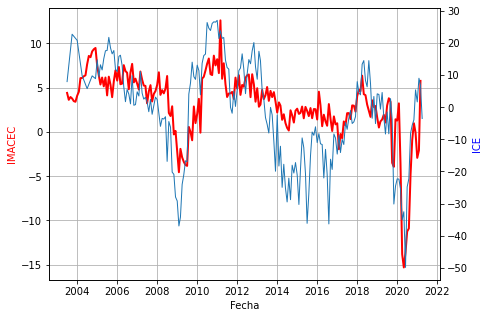

In [13]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(data['imacec'], color='red', linewidth=2)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('IMACEC', color='red')
plt.grid()
ax2 = ax1.twinx()
ax2.plot(data[['ice']],  linewidth=1)
ax2.set_ylabel('ICE', color='blue')

<AxesSubplot:>

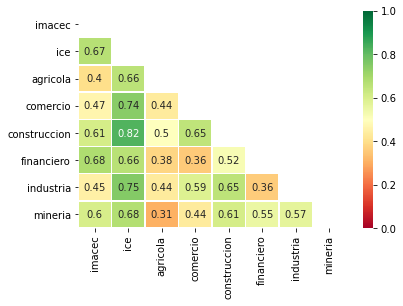

In [14]:
corr_mat = data.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

In [55]:
data['ice3'] = data['ice'].rolling(3).mean()
data['ice6'] = data['ice'].rolling(6).mean()
data['ice12'] = data['ice'].rolling(12).mean()

<AxesSubplot:>

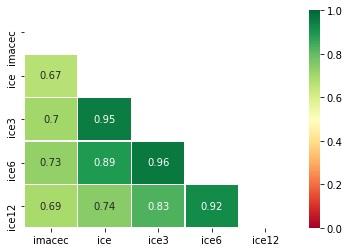

In [16]:
corr_mat = data[['imacec', 'ice', 'ice3', 'ice6', 'ice12']].corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

In [17]:
data['imacec-f03'] = data['imacec'].shift(-3)
data['imacec-f06'] = data['imacec'].shift(-6)
data['imacec-f12'] = data['imacec'].shift(-12)

<AxesSubplot:>

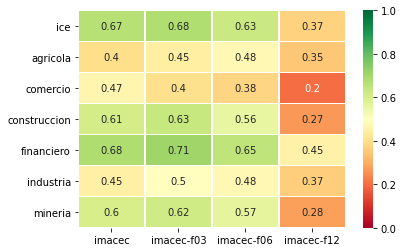

In [20]:
corr_mat = data[['imacec', 'imacec-f03', 'imacec-f06', 'imacec-f12', 'ice', 'agricola', 'comercio', 'construccion', 'financiero', 'industria', 'mineria']].corr()
corr_mat = corr_mat[['imacec', 'imacec-f03', 'imacec-f06', 'imacec-f12']].loc[['ice', 'agricola', 'comercio', 'construccion', 'financiero', 'industria', 'mineria']]

fig, ax = plt.subplots()
sns.heatmap(corr_mat, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

In [23]:
corr_mat.idxmax()

imacec        financiero
imacec-f03    financiero
imacec-f06    financiero
imacec-f12    financiero
dtype: object

In [57]:
data['ice1'] = data[['comercio', 'construccion', 'financiero', 'industria', 'mineria']].mean(axis=1)
data['ice2'] = data[['construccion', 'financiero', 'mineria']].mean(axis=1)
corr_mat = data[['imacec', 'imacec-f03', 'imacec-f06', 'imacec-f12', 'ice', 'financiero', 'ice2', 'ice1']].corr()
corr_mat = corr_mat[['imacec', 'imacec-f03', 'imacec-f06', 'imacec-f12']].loc[['ice', 'financiero', 'ice1', 'ice2']]

fig, ax = plt.subplots()
sns.heatmap(corr_mat, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['ice1'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"